<font color = "#CC3D3D">
# End-to-End Machine Learning Project #
<p>
- #### *Based on CRISP-DM & scikit-learn*    
<br>
<img align="left" src="http://www.kdnuggets.com/wp-content/uploads/crisp-dm-4-problems-fig1.png" alt="CRISP-DM">

## Step 1: Business Understanding ##

1. Business Objectives
 - 새로운 개인연금상품(PEP: Personal Equity Plan)을 개발하여 기존 고객들을 대상으로 가능한 많은 계좌를 유치
2. Analytics Goals
 - PEP 가입 예측모형 개발
 - 고객 프로파일 개발
 - 다이렉트 메일 광고 효율성 제고
 - 타겟 메일링에 의한 응답률 제고 

## Step 2: Data Understanding ##
1. 데이터 획득 절차
 - 기존고객 DB로부터 시험메일 발송을 위한 표본고객목록을 추출
 - 새로운 금융상품(PEP)의 제안 메일을 발송
 - 고객의 반응을 기록
2. 분석 데이터
 - 학습용 데이터 600건
 - 신규고객 데이터 200건

In [1]:
import pandas as pd
from pandas import Series, DataFrame
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

### Collect Initial Data ###

##### for modeling

#### 변수명설명
- save_act : 저축 계좌 보유 여부(0=없음, 1=있음)
- current_act : 현재 계좌 보유 여부(0=없음, 1=있음)
- mortgage : 대출 여부(0=없음, 1=있음)

In [2]:
df = pd.read_csv("data_pepTestCustomers.csv")
df

,id,age,sex,region,income,married,children,car,save_act,current_act,mortgage,pep
0,ID12101,48.0,0,0,17546.00,0,1,0,0,0,0,1
1,ID12102,40.0,1,3,30085.10,1,3,1,0,1,1,0
2,ID12103,NaN,0,0,16575.40,1,0,1,1,1,0,0
3,ID12104,23.0,0,3,20375.40,1,3,0,0,1,0,0
4,ID12105,57.0,0,1,50576.30,1,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
595,ID12696,61.0,0,0,47025.00,0,2,1,1,1,1,0
596,ID12697,30.0,0,0,9672.25,1,0,1,1,1,0,0
597,ID12698,31.0,0,3,15976.30,1,0,1,1,0,0,1
598,ID12699,29.0,1,0,14711.80,1,0,0,1,0,1,0


##### for deployment

In [3]:
new = pd.read_csv("data_pepNewCustomers.csv")
new.head()

,id,age,sex,region,income,married,children,car,save_act,current_act,mortgage
0,ID12701,23,1,0,18766.90,1,0,1,1,0,1
1,ID12702,30,1,1,9915.67,0,1,0,1,0,1
2,ID12703,45,0,1,21881.60,0,0,1,1,1,0
3,ID12704,50,1,3,46794.40,1,2,0,1,0,1
4,ID12705,41,0,0,20721.10,1,0,1,1,1,0


### Describe Data ###

In [4]:
# 데이터 구조 살펴보기
# ex) age의 경우 600개중 540개만 있어서 60개가 결측치로 예상
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 600 entries, 0 to 599
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   id           600 non-null    object 
 1   age          540 non-null    float64
 2   sex          600 non-null    int64  
 3   region       600 non-null    int64  
 4   income       600 non-null    float64
 5   married      600 non-null    int64  
 6   children     600 non-null    int64  
 7   car          600 non-null    int64  
 8   save_act     600 non-null    int64  
 9   current_act  600 non-null    int64  
 10  mortgage     600 non-null    int64  
 11  pep          600 non-null    int64  
dtypes: float64(2), int64(9), object(1)
memory usage: 56.4+ KB


In [5]:
# 수치형 속성의 요약통계 보기
df.describe()

,age,sex,region,income,married,children,car,save_act,current_act,mortgage,pep
count,540.000000,600.000000,600.000000,600.000000,600.000000,600.000000,600.000000,600.000000,600.000000,600.000000,600.000000
mean,42.662963,0.500000,1.231667,27619.973883,0.660000,1.011667,0.493333,0.690000,0.758333,0.348333,0.456667
std,14.299387,0.500417,1.286113,13187.408966,0.474104,1.056752,0.500373,0.462879,0.428451,0.476840,0.498534
min,18.000000,0.000000,0.000000,5014.210000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,31.000000,0.000000,0.000000,17264.500000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
50%,42.500000,0.500000,1.000000,24925.300000,1.000000,1.000000,0.000000,1.000000,1.000000,0.000000,0.000000
75%,56.000000,1.000000,3.000000,36172.675000,1.000000,2.000000,1.000000,1.000000,1.000000,1.000000,1.000000
max,67.000000,1.000000,3.000000,95435.200000,1.000000,3.000000,1.000000,1.000000,1.000000,1.000000,1.000000


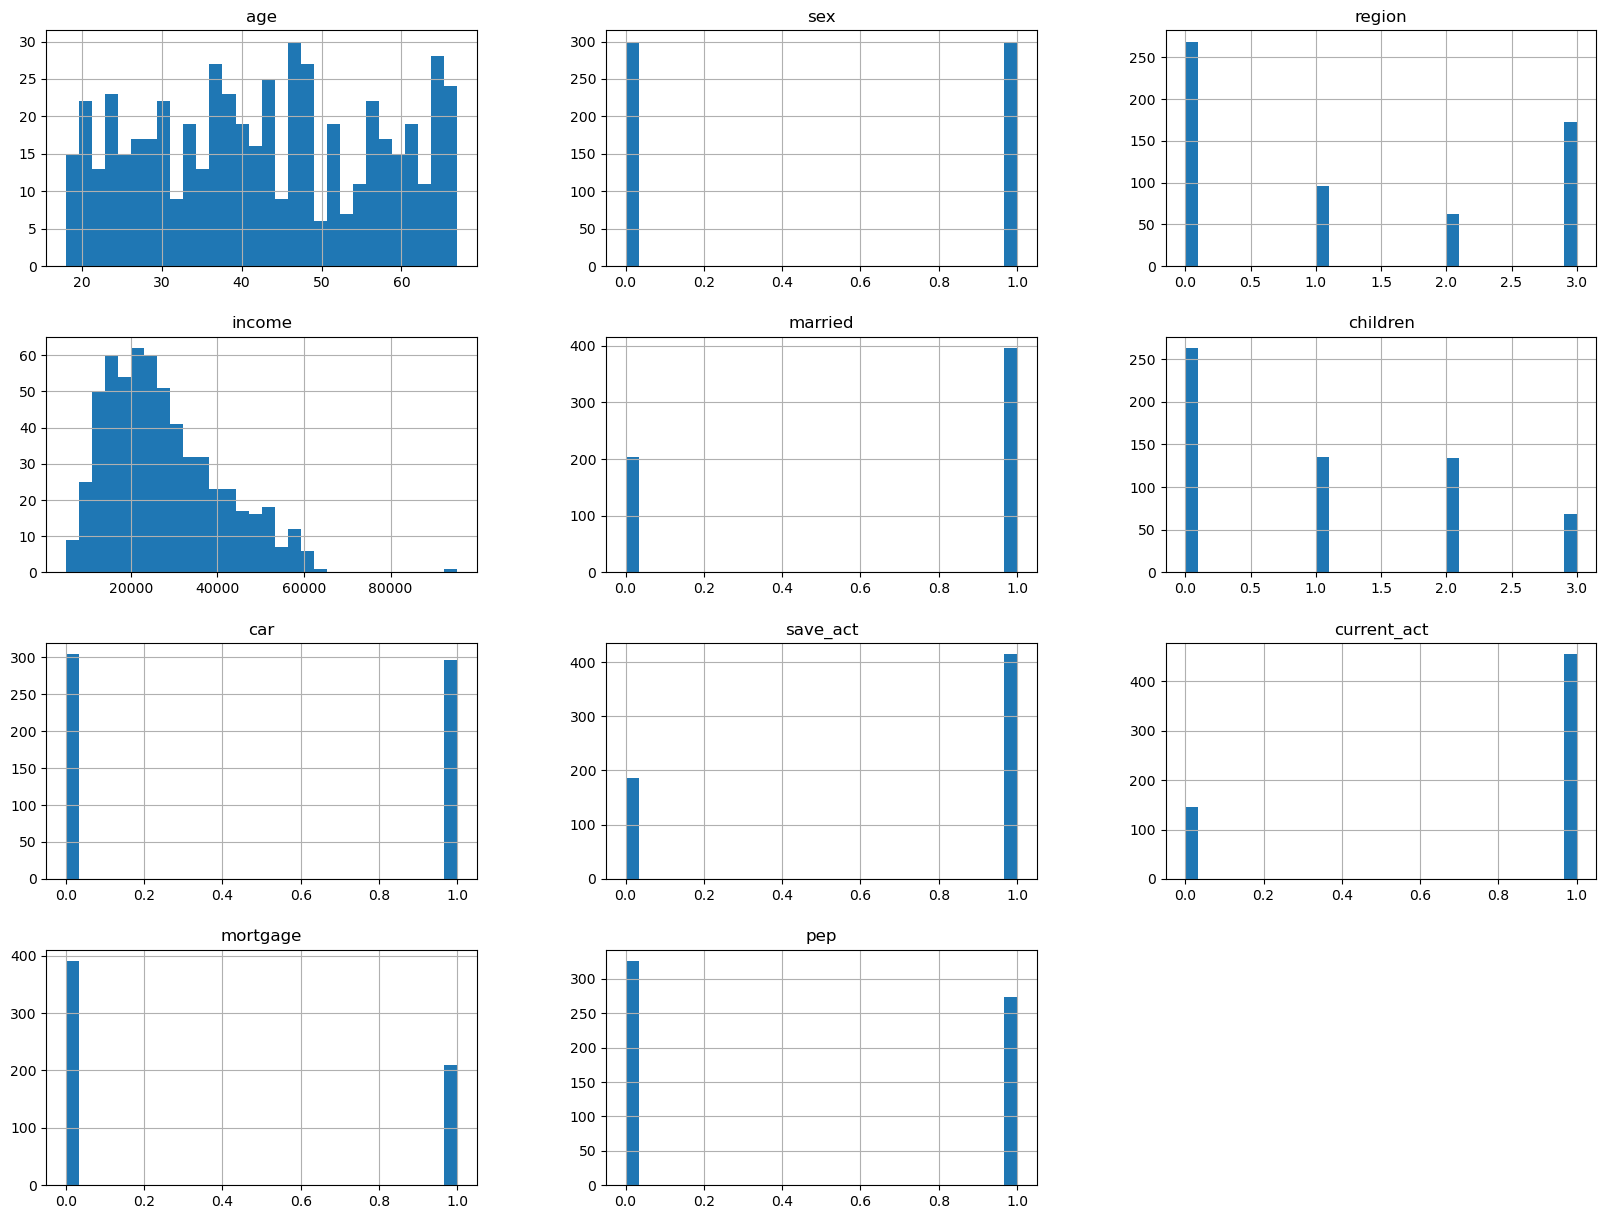

In [6]:
# 모든 수치형 속성에 대한 히스토그램 한꺼번에 그리기
df.hist(bins=30, figsize=(20, 15))
plt.show()

##### Find Missing Values

In [7]:
# 결측값이 존재하는 속성이 무엇인지, 몇개나 있는지 파악할 수 있는 두번째 방법
# null 갯수 체크
df.isnull().sum()

id              0
age            60
sex             0
region          0
income          0
married         0
children        0
car             0
save_act        0
current_act     0
mortgage        0
pep             0
dtype: int64

In [8]:
df.head(3)

,id,age,sex,region,income,married,children,car,save_act,current_act,mortgage,pep
0,ID12101,48.0,0,0,17546.0,0,1,0,0,0,0,1
1,ID12102,40.0,1,3,30085.1,1,3,1,0,1,1,0
2,ID12103,NaN,0,0,16575.4,1,0,1,1,1,0,0


In [9]:
# 상관계수
corr = df.iloc[:, 1:].corr()

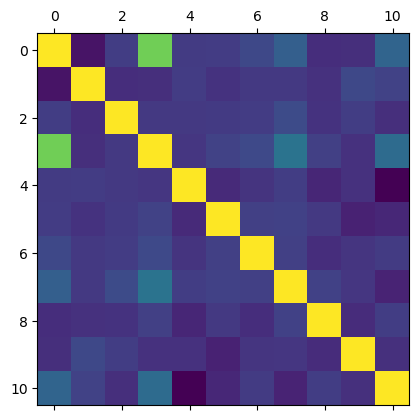

In [10]:
# 상관계수 그림으로 도식화
plt.matshow(corr)
plt.show()

In [11]:
import seaborn as sns

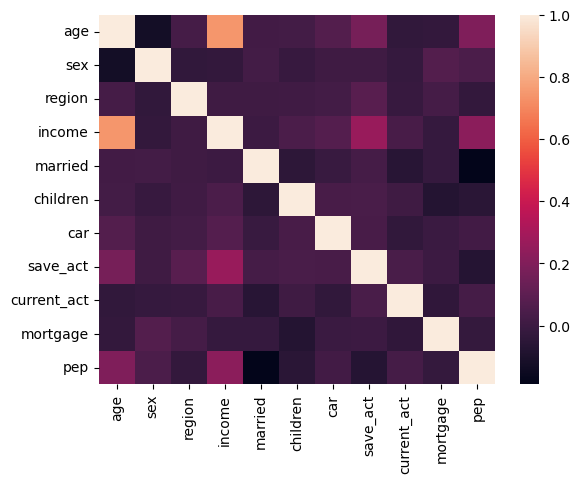

In [12]:
sns.heatmap(corr)
plt.show()

In [13]:
# pep 와 각 속성간의 피어슨 상관계수를 내림차순으로 출력하기
corr.pep.sort_values(ascending=False)

pep            1.000000
income         0.225086
age            0.193604
sex            0.046843
current_act    0.025141
car            0.018917
mortgage      -0.024182
region        -0.027279
children      -0.057663
save_act      -0.072779
married       -0.189578
Name: pep, dtype: float64

In [14]:
# 나이와 수입 속성에 이상치(값)가 있는지 Boxplot 을 그려보자
# 이상치 발굴은 boxplot에서 박스 밖에 있는 점을 이상치(Outlier)로 본다.

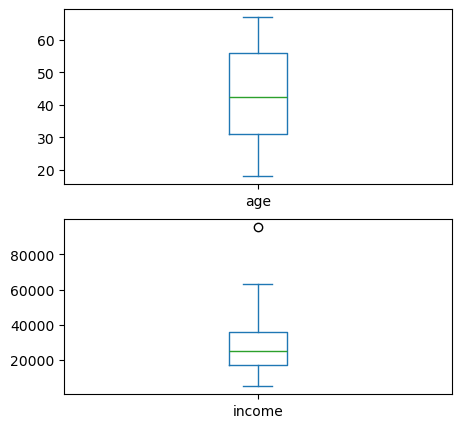

In [15]:
df.loc[:, ['age','income']].plot.box\
(subplots=True, layout=(2,1), figsize=(5,5))
plt.show()

## Step 3: Data Preparation ##

In [16]:
# Save original data
# => 학습 데이터를 조작하다가 문제가 생겨 처음으로 되돌아 가려면 이 셀부터
# 다시 시작하세요 !!!
# 데이터 원본 유지를 위해 copy를 사용
mdf = df.copy()

### Clean Data ###
##### Replace Missing Values #####

In [17]:
# 평균값으로 결측값 대체하기
# fillna 는 널값을 채우라. 여기서는 평균으로 채우고 있음.
# 분석의 상황에 따라 null 값을 그대로 사용함.
mdf.age.fillna(round(mdf.age.mean(),0), inplace=True)
mdf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 600 entries, 0 to 599
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   id           600 non-null    object 
 1   age          600 non-null    float64
 2   sex          600 non-null    int64  
 3   region       600 non-null    int64  
 4   income       600 non-null    float64
 5   married      600 non-null    int64  
 6   children     600 non-null    int64  
 7   car          600 non-null    int64  
 8   save_act     600 non-null    int64  
 9   current_act  600 non-null    int64  
 10  mortgage     600 non-null    int64  
 11  pep          600 non-null    int64  
dtypes: float64(2), int64(9), object(1)
memory usage: 56.4+ KB


C:\Users\admin\AppData\Local\Temp\ipykernel_19396\1187411247.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  mdf.age.fillna(round(mdf.age.mean(),0), inplace=True)


In [18]:
mdf.head(3)

,id,age,sex,region,income,married,children,car,save_act,current_act,mortgage,pep
0,ID12101,48.0,0,0,17546.0,0,1,0,0,0,0,1
1,ID12102,40.0,1,3,30085.1,1,3,1,0,1,1,0
2,ID12103,43.0,0,0,16575.4,1,0,1,1,1,0,0


In [19]:
# 명목소득 보다 명목소득을 자녀수로 나눈 실질소득이 개인연금 가입에 더 
# 유효한 속성이라 가정하고 이를 구현해 본다.
mdf['realincome'] = np.where(mdf['children']==0, mdf['income'], \
                             mdf['income']/mdf['children'])

In [20]:
mdf.head(3)

,id,age,sex,region,income,married,children,car,save_act,current_act,mortgage,pep,realincome
0,ID12101,48.0,0,0,17546.0,0,1,0,0,0,0,1,17546.000000
1,ID12102,40.0,1,3,30085.1,1,3,1,0,1,1,0,10028.366667
2,ID12103,43.0,0,0,16575.4,1,0,1,1,1,0,0,16575.400000


### Select Data

In [21]:
# 파생변수인 실질소득을 유도하는데 사용된 명목소득과 자녀수를 제거
# pep와 상관계계가 거의 없는 current_act, car, mortgage, region 속성 제거
columns = ['income', 'children', 'current_act', 'car', 'mortgage', 'region']
mdf = mdf.drop(columns, axis=1)

In [22]:
mdf.head()

,id,age,sex,married,save_act,pep,realincome
0,ID12101,48.0,0,0,0,1,17546.000000
1,ID12102,40.0,1,1,0,0,10028.366667
2,ID12103,43.0,0,1,1,0,16575.400000
3,ID12104,23.0,0,1,0,0,6791.800000
4,ID12105,57.0,0,1,1,0,50576.300000


In [23]:
# for Hold-out validation
from sklearn.model_selection import train_test_split  

In [24]:
# scikit-learn에서는 속성과 클래스를 분리하여야 한다.

dfX = mdf.drop(['id','pep'], axis=1)  # exclude 'id' attribute & class variable
dfy = mdf['pep']                    # class variable
X_train, X_test, y_train, y_test = train_test_split(dfX, dfy, test_size=0.25, random_state=0)

In [25]:
# 지정한 비율(75:25)로 데이터가 잘 나누어졌는지 확인
display(X_train.shape, X_test.shape)
X_train.head()

(450, 5)

(150, 5)

,age,sex,married,save_act,realincome
46,50.0,0,0,1,13283.9
263,60.0,0,1,1,46358.4
458,18.0,1,0,1,13700.2
230,59.0,0,1,0,30189.4
107,23.0,1,1,0,13039.9


## Step 4: Modeling ##

In [26]:
# 1. Import the estimator
from sklearn.tree import DecisionTreeClassifier

In [27]:
# 2. Instantiate the estimator
tree = DecisionTreeClassifier(max_depth=6, random_state=0)

In [28]:
# 3. Fit the data to the estimator
tree.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=6, random_state=0)

In [29]:
# 4. Generate a prediction
pred_tree = tree.predict(X_test); pred_tree

array([0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0,
       0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1,
       0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1,
       1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0], dtype=int64)

In [30]:
# 5. Evaluate the estimator
display(tree.score(X_train, y_train))
display(tree.score(X_test, y_test))

0.8177777777777778

0.66

In [31]:
from sklearn.svm import SVC
svm = SVC(random_state=0)
svm.fit(X_train, y_train)

SVC(random_state=0)

In [32]:
from sklearn.neural_network import MLPClassifier
mlp = MLPClassifier()
mlp.fit(X_train, y_train)

MLPClassifier()

In [33]:
display(tree.score(X_train, y_train))
display(tree.score(X_test, y_test)) # 평가 요소

0.8177777777777778

0.66

In [34]:
display(svm.score(X_train, y_train))
display(svm.score(X_test, y_test))

0.6955555555555556

0.6533333333333333

In [35]:
display(mlp.score(X_train, y_train))
display(mlp.score(X_test, y_test))

0.4488888888888889

0.48

## Step 5: Evaluation ##

In [36]:
best_model = tree
best_model.score(X_test, y_test)

0.66

In [37]:
# 랜덤 모형의 성능과 개발 모형의 성능을 비교한다.
from sklearn.dummy import DummyClassifier
DummyClassifier(strategy='most_frequent').fit(X_train, y_train)\
.score(X_test, y_test)

0.52

## Step 6: Deployment ##

In [38]:
ndf = new.copy()
ndf['realincome'] = np.where(ndf['children']==0, ndf['income'], \
                             ndf['income']/ndf['children'])
ndf = ndf.drop(columns, axis=1)
ndf.head(3)

,id,age,sex,married,save_act,realincome
0,ID12701,23,1,1,1,18766.90
1,ID12702,30,1,0,1,9915.67
2,ID12703,45,0,0,1,21881.60


### A Case: Apply the best model to select target customers ###

In [40]:
# 개발 모형에 고객 데이터를 적용하여 개인연금 구매여부를 예측: id 제외
ndf['pred'] = tree.predict(ndf.loc[:,'age':'realincome'])

In [41]:
# 개인연금 구매확률을 예측: predict_proba() 사용
print(tree.predict_proba(ndf.loc[:,'age':'realincome']))
ndf['pred_prob'] = tree.predict_proba(ndf.loc[:,'age':'realincome'])[:,1]
ndf.head()

[[0.51470588 0.48529412]
 [1.         0.        ]
 [0.         1.        ]
 [0.         1.        ]
 [0.51470588 0.48529412]
 [0.13333333 0.86666667]
 [0.83870968 0.16129032]
 [0.7027027  0.2972973 ]
 [1.         0.        ]
 [0.1        0.9       ]
 [0.61538462 0.38461538]
 [0.         1.        ]
 [0.1        0.9       ]
 [0.51470588 0.48529412]
 [0.925      0.075     ]
 [0.7027027  0.2972973 ]
 [0.         1.        ]
 [0.1        0.9       ]
 [0.75       0.25      ]
 [1.         0.        ]
 [0.13333333 0.86666667]
 [0.925      0.075     ]
 [0.61538462 0.38461538]
 [0.83870968 0.16129032]
 [0.925      0.075     ]
 [1.         0.        ]
 [0.83870968 0.16129032]
 [0.83870968 0.16129032]
 [0.1        0.9       ]
 [1.         0.        ]
 [0.13333333 0.86666667]
 [0.925      0.075     ]
 [0.925      0.075     ]
 [0.925      0.075     ]
 [0.51470588 0.48529412]
 [0.         1.        ]
 [0.51470588 0.48529412]
 [0.7027027  0.2972973 ]
 [1.         0.        ]
 [1.         0.        ]


,id,age,sex,married,save_act,realincome,pred,pred_prob
0,ID12701,23,1,1,1,18766.90,0,0.485294
1,ID12702,30,1,0,1,9915.67,0,0.000000
2,ID12703,45,0,0,1,21881.60,1,1.000000
3,ID12704,50,1,1,1,23397.20,1,1.000000
4,ID12705,41,0,1,1,20721.10,0,0.485294


In [42]:
# 특정 조건을 만족하는 고객 리스트를 추출하고 저장
# query 조건 만족 행을 뽑을 때 사용
target = ndf.query('pred == 1 & pred_prob > 0.7')  # PEP에 가입할 확율이 70%가 넘는 고객만 추출
target.sort_values(by="pred_prob", ascending=False).to_csv("pep_target.csv", index=False)
pd.read_csv("pep_target.csv").tail()

,id,age,sex,married,save_act,realincome,pred,pred_prob
56,ID12869,41,1,0,1,21122.6,1,0.866667
57,ID12798,37,1,0,1,31979.9,1,0.866667
58,ID12755,34,1,0,1,17221.3,1,0.866667
59,ID12706,20,1,0,1,16688.5,1,0.866667
60,ID12782,44,1,0,1,39202.2,1,0.866667
